# Relplot

In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset("titanic")

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Create new column with age decade bucket for each passenger.

In [3]:
df['decade'] = [age//10*10 for age in df.age]

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,decade
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,20.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,30.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,20.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,30.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,30.0


## Basics

In [4]:
sns.set_style("white")

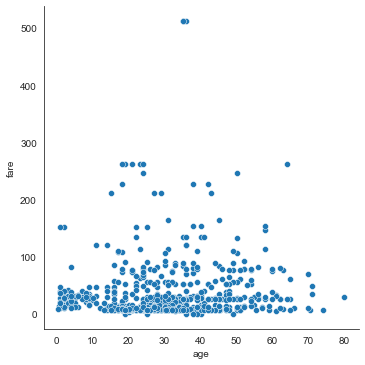

In [5]:
sns.relplot(data=df, x="age", y="fare")

### Categorical Variables: Hue, Style, Size

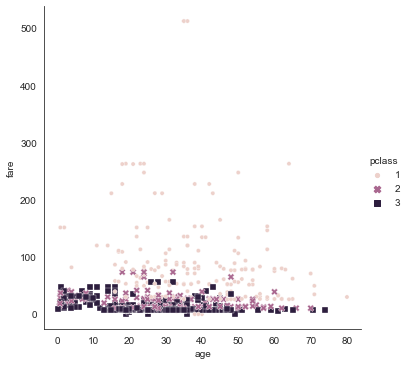

In [6]:
sns.relplot(data=df, x="age", y="fare",
            hue="pclass",
            style="pclass",
            size="pclass")

# kind

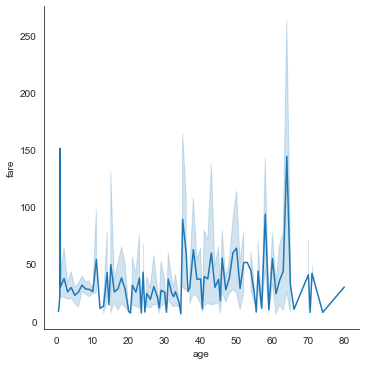

In [7]:
sns.relplot(data=df, x="age", y="fare", kind="line")

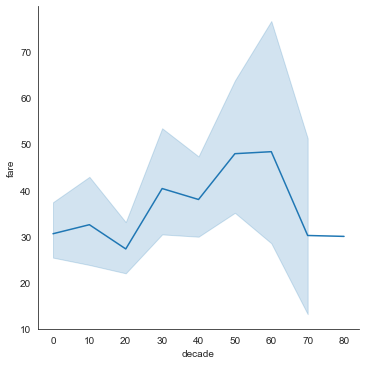

In [8]:
sns.relplot(data=df, x="decade", y="fare", kind="line")

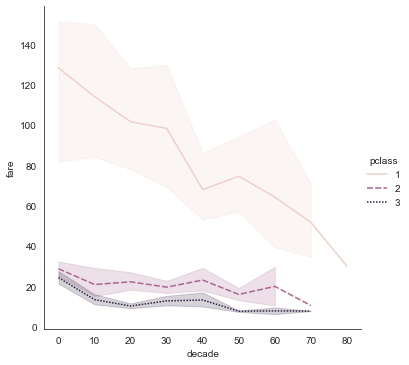

In [9]:
sns.relplot(data=df, x="decade", y="fare", kind="line",
            hue="pclass",
            style="pclass")

## Small Multiples (FacetGrid)

## ``row``, ``col``

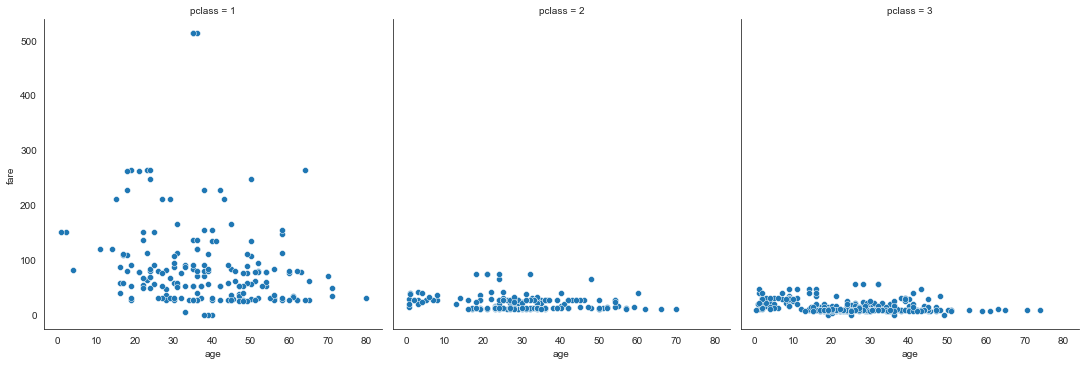

In [10]:
sns.relplot(data=df, x="age", y="fare",
            col="pclass")

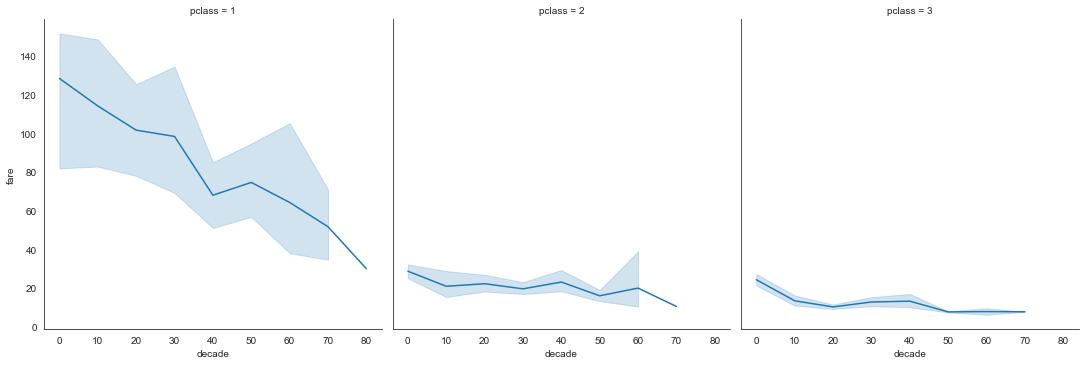

In [11]:
sns.relplot(data=df, x="decade", y="fare",
            kind="line",
            col="pclass")

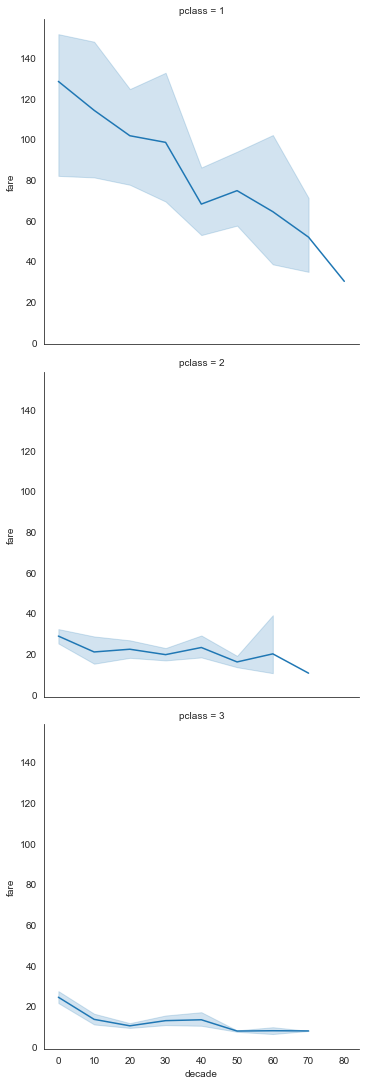

In [12]:
sns.relplot(data=df, x="decade", y="fare",
            kind="line",
            row="pclass")

### ``col_wrap``

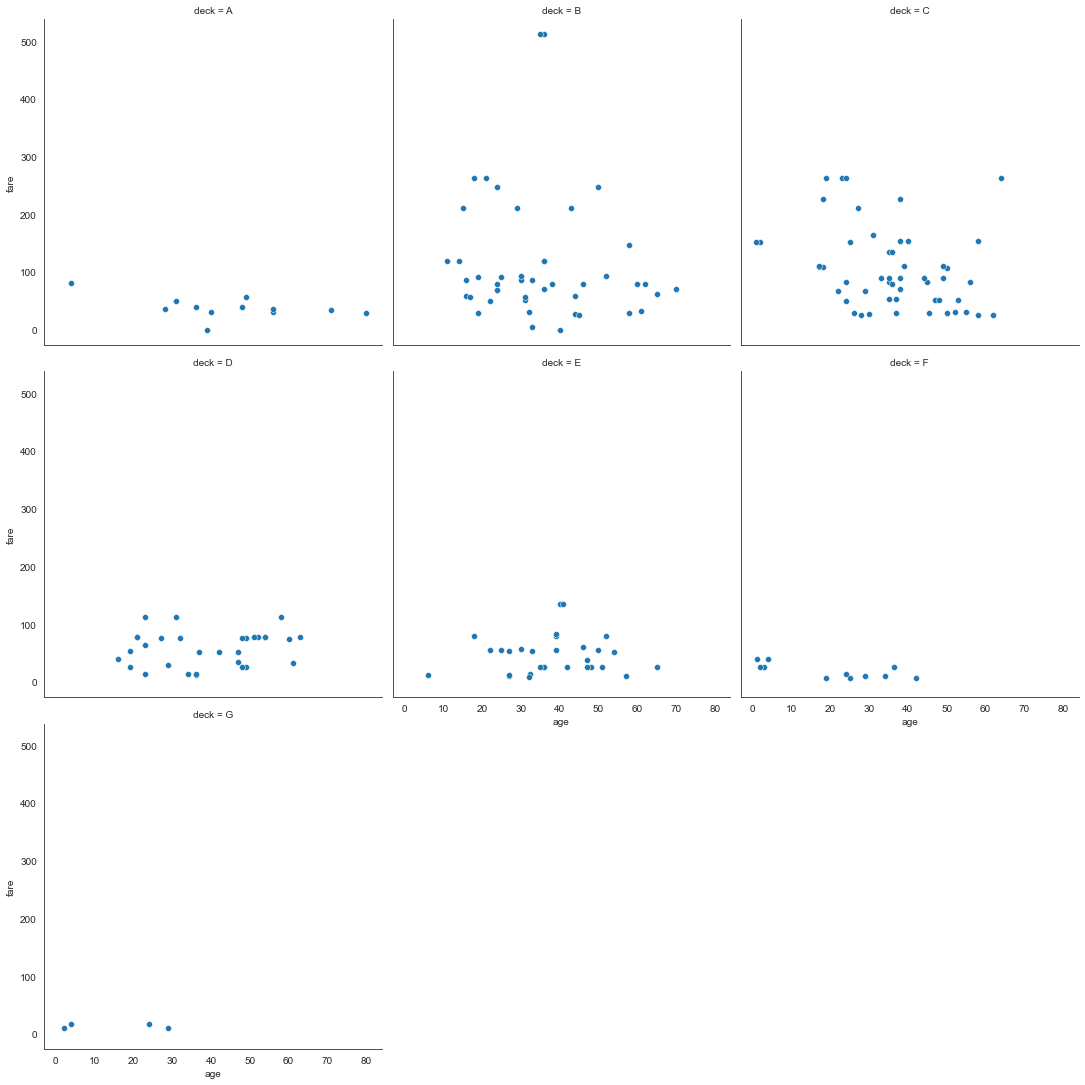

In [13]:
sns.relplot(data=df, x="age", y="fare",
            col="deck",
            col_wrap=3)

## Styling

In general, additional keyword arguments will be passed to the kind of plot selected.

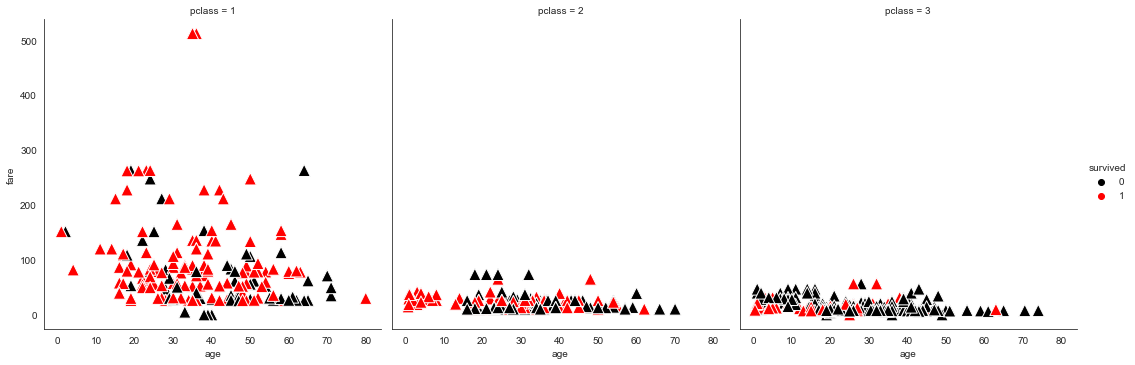

In [14]:
sns.relplot(x='age', y='fare', data=df,
            col='pclass',
            hue='survived',
            s=150,
            palette=['black', 'red'],
            marker='^'
           );

### ``markers``, ``sizes``

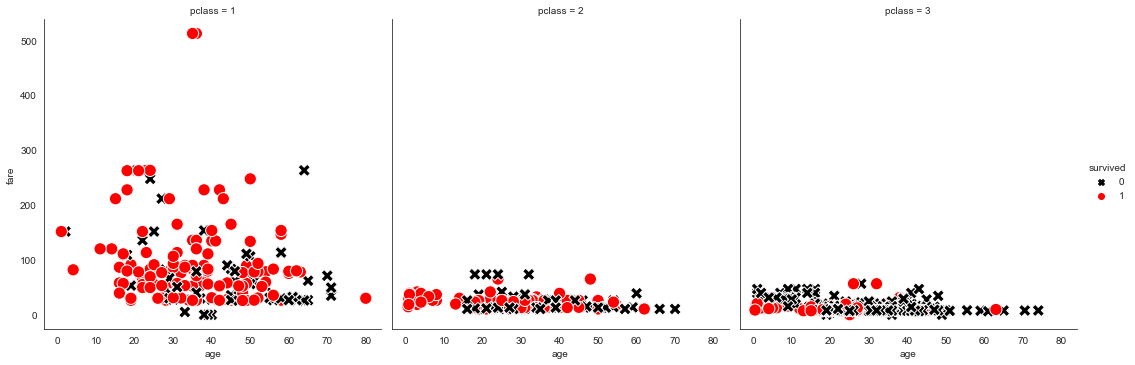

In [15]:
sns.relplot(x='age', y='fare', data=df,
            col='pclass',
            hue='survived',
            s = 150, 
            palette=['black', 'red'],
            style='survived',
            markers=['X', 'o']
           );

### FacetGrid Styling

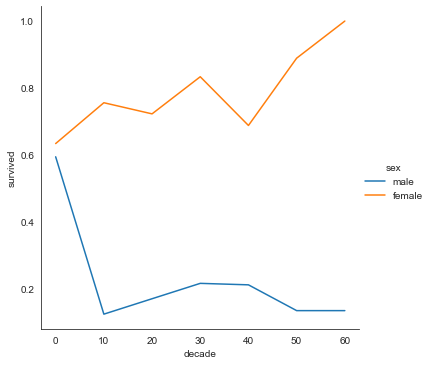

In [16]:
g = sns.relplot(x='decade', y='survived',
                data=df[df.age < 70],
                kind='line',
                hue='sex',
                ci=None
               );

In [17]:
type(g)

seaborn.axisgrid.FacetGrid

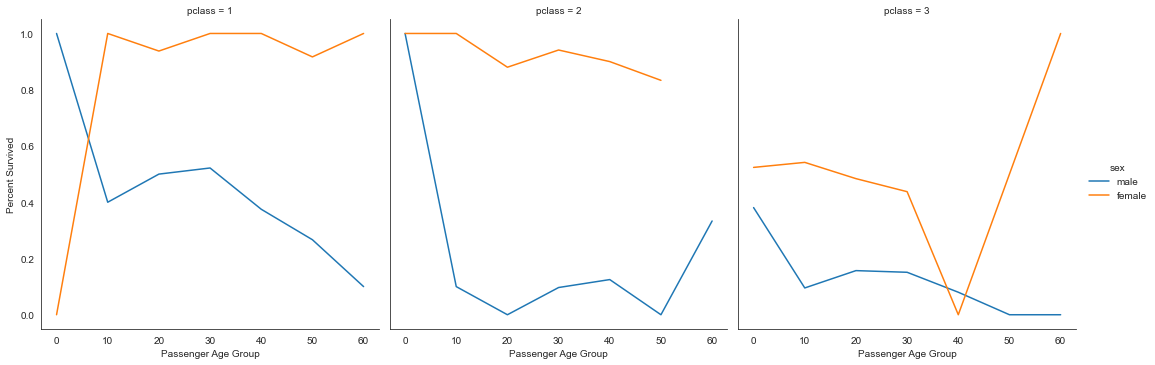

In [18]:
g = sns.relplot(x='decade', y='survived',
                data=df[df.age < 70],
                kind='line',
                hue='sex',
                ci=None,
                col='pclass'
               )

g.set_xlabels('Passenger Age Group')
g.set_ylabels("Percent Survived");